**Project presentation file**

https://www.canva.com/design/DAFOGH3MxW8/TIUfrcnzZEUQDr3Nexbb-Q/edit?utm_content=DAFOGH3MxW8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

# **IMPORTING STATEMENTS**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

import tensorflow as tf

# **LOADING THE DATA**

In [ ]:
data = pd.read_csv('/content/fertility.csv')
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


Replaced our target variable Output in the form of 0's and 1's

In [ ]:
data["Output"] = data["Output"].replace({'N': 0, 'O': 1})

In [ ]:
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 100 non-null    float64
 1   Age                    100 non-null    float64
 2   Childish_diseases      100 non-null    int64  
 3   Accident_trauma        100 non-null    int64  
 4   Surgical_intervention  100 non-null    int64  
 5   High_fevers_time       100 non-null    int64  
 6   ol_cons                100 non-null    float64
 7   Smoking                100 non-null    int64  
 8   Sitting                100 non-null    float64
 9   Output                 100 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 7.9 KB


In [ ]:
data.shape

(100, 10)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,100.0,-0.0789,0.796725,-1.00,-1.00,-0.33,1.00,1.0
Age,100.0,0.6690,0.121319,0.50,0.56,0.67,0.75,1.0
Childish_diseases,100.0,0.8700,0.337998,0.00,1.00,1.00,1.00,1.0
Accident_trauma,100.0,0.4400,0.498888,0.00,0.00,0.00,1.00,1.0
Surgical_intervention,100.0,0.5100,0.502418,0.00,0.00,1.00,1.00,1.0
High_fevers_time,100.0,0.1900,0.580752,-1.00,0.00,0.00,1.00,1.0
ol_cons,100.0,0.8320,0.167501,0.20,0.80,0.80,1.00,1.0
Smoking,100.0,-0.3500,0.808728,-1.00,-1.00,-1.00,0.00,1.0
Sitting,100.0,0.4068,0.186395,0.06,0.25,0.38,0.50,1.0
Output,100.0,0.1200,0.326599,0.00,0.00,0.00,0.00,1.0


In [ ]:
data.head()

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


In [ ]:
data.isna().sum()

Season                   0
Age                      0
Childish_diseases        0
Accident_trauma          0
Surgical_intervention    0
High_fevers_time         0
ol_cons                  0
Smoking                  0
Sitting                  0
Output                   0
dtype: int64

**No Null values are present in our dataset**

In [ ]:
X = data.iloc[:, 1:-1].values
Y = data.iloc[:, -1].values

In [ ]:
X.shape

(100, 8)

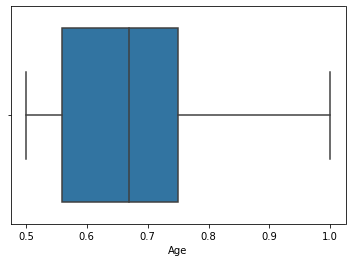

In [ ]:
sns.boxplot(data=data,x='Age')

# EXPLORATORY DATA ANALYSIS

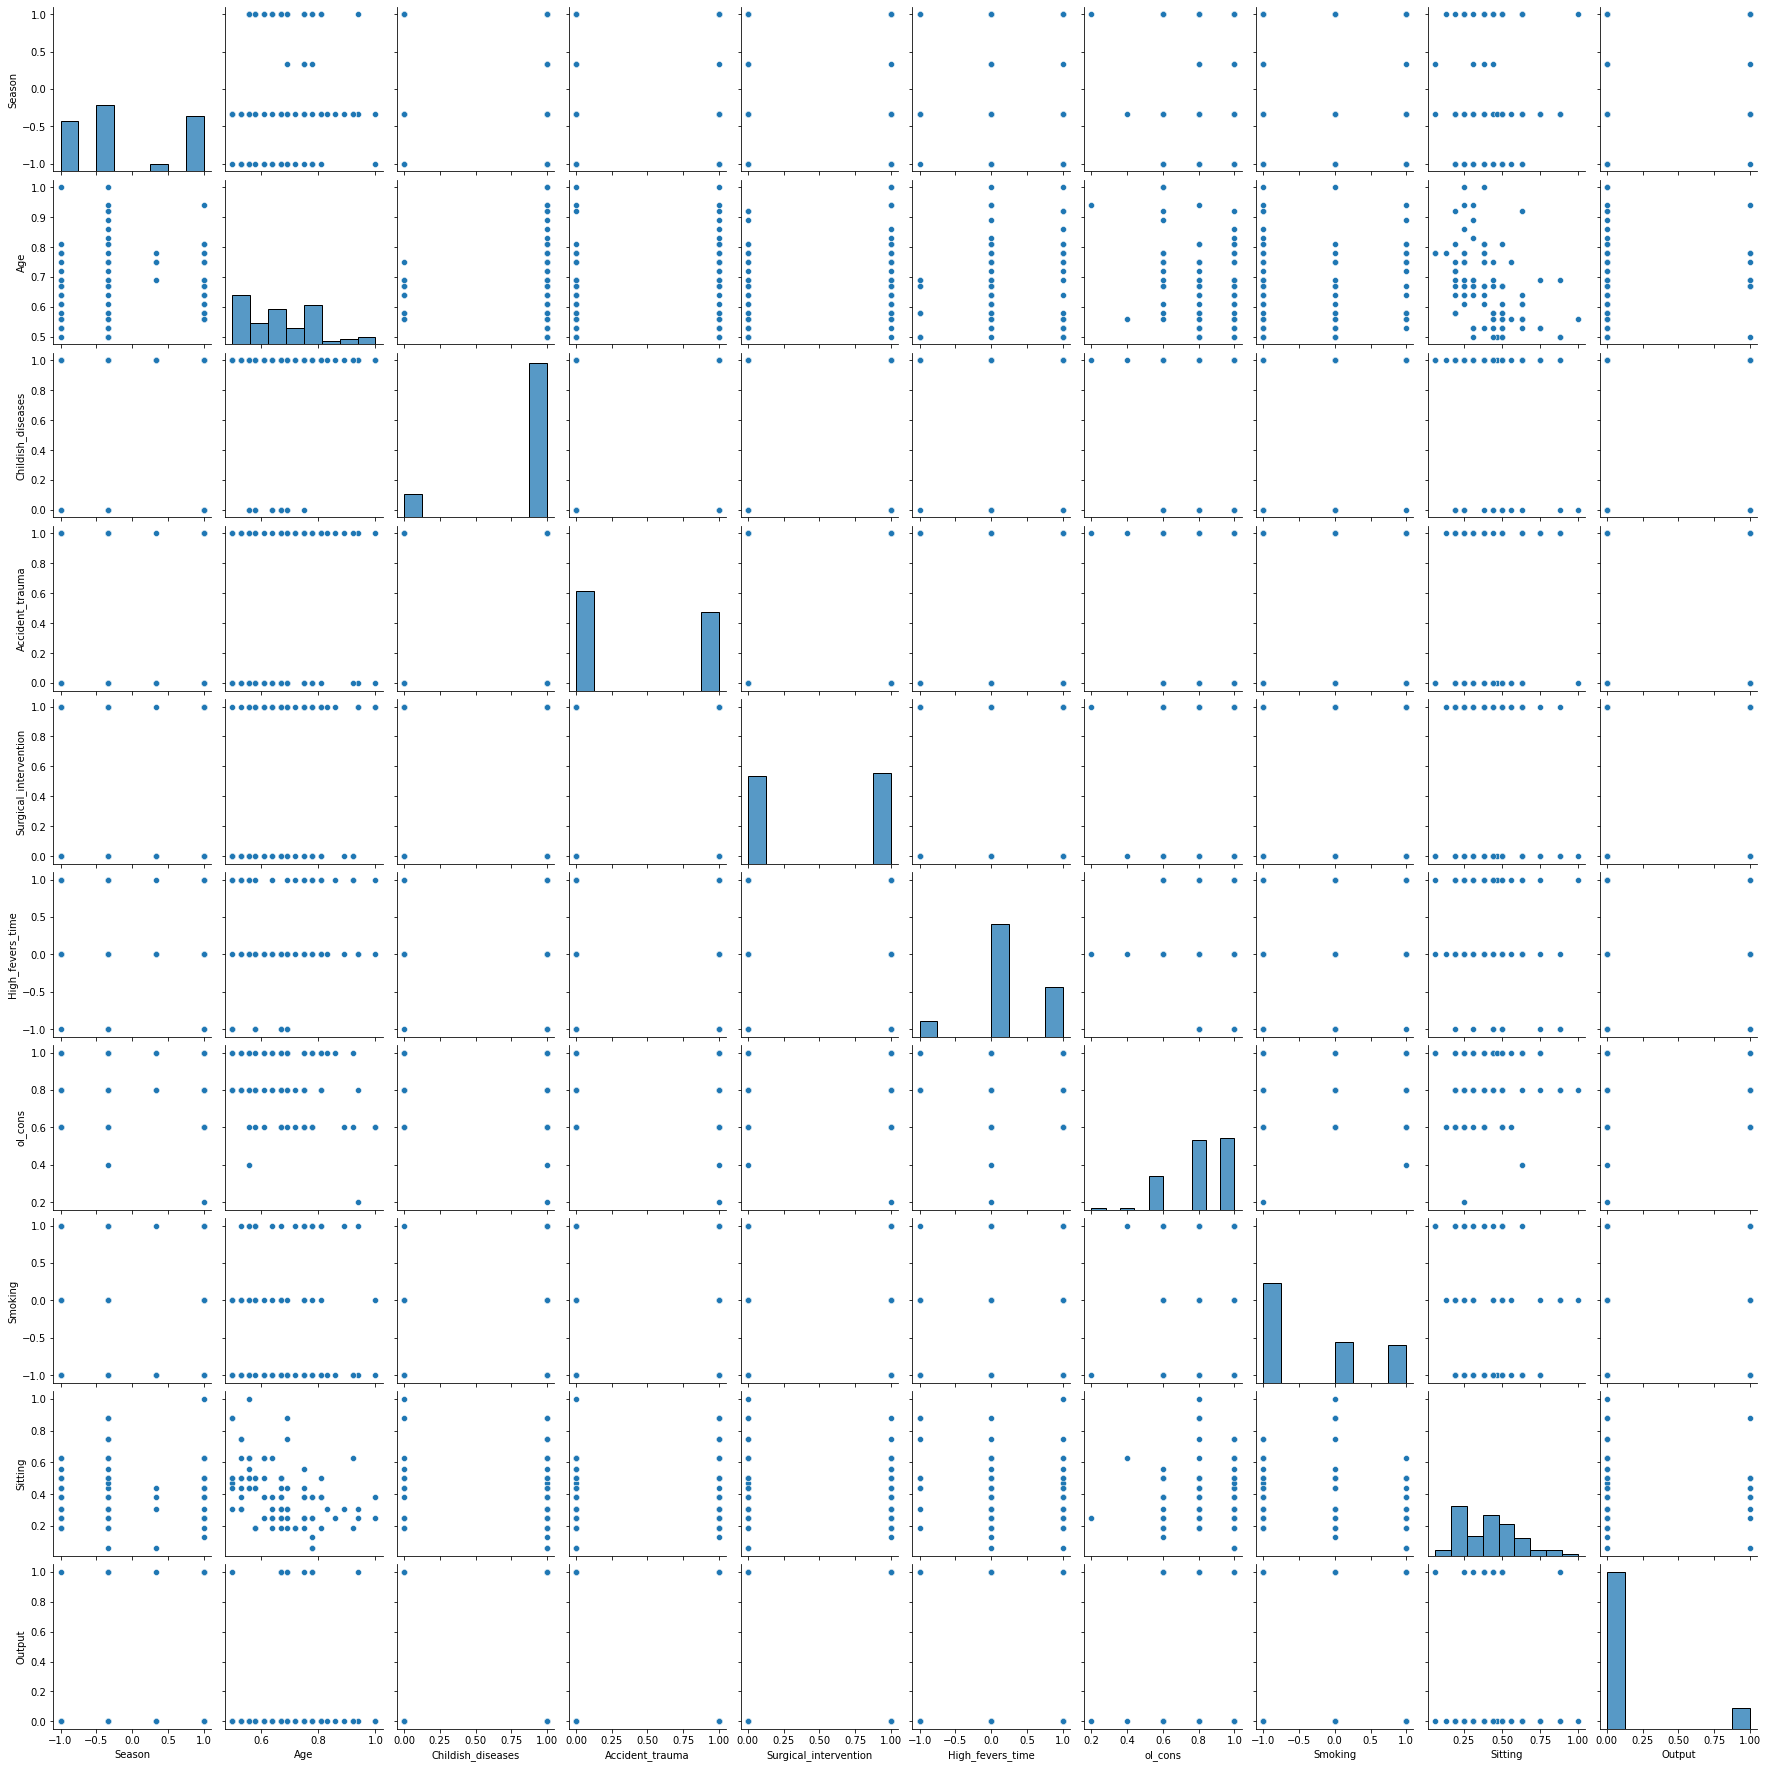

In [ ]:
sns.pairplot( data)

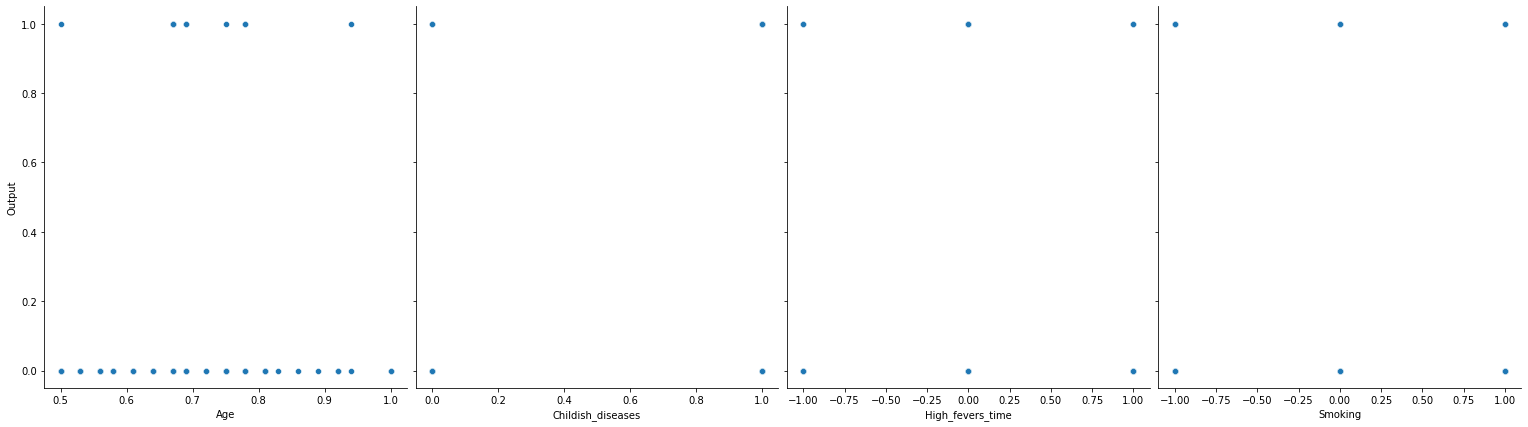

In [ ]:
sns.pairplot(data, x_vars=['Age','Childish_diseases','High_fevers_time','Smoking'], y_vars='Output',height=6,aspect=0.9)

Plot 1


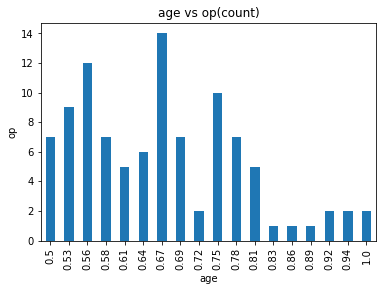

In [ ]:
from matplotlib import pyplot as plt
C1 = data.groupby('Age')['Output'].count()
C1
#plot count
print("Plot 1")
C1.plot(kind="bar", title="test")
plt.title("age vs op(count)")
plt.xlabel("age")
plt.ylabel("op")
plt.show();

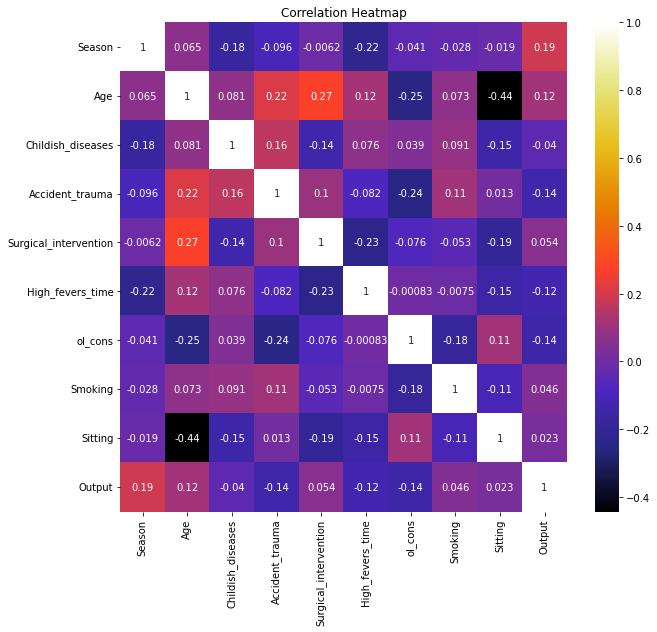

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),annot=True, cmap='CMRmap')
plt.title("Correlation Heatmap")
plt.show()

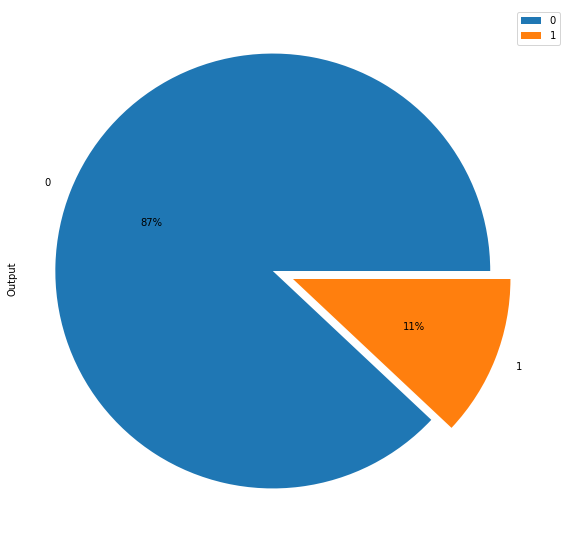

In [ ]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
data['Output'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

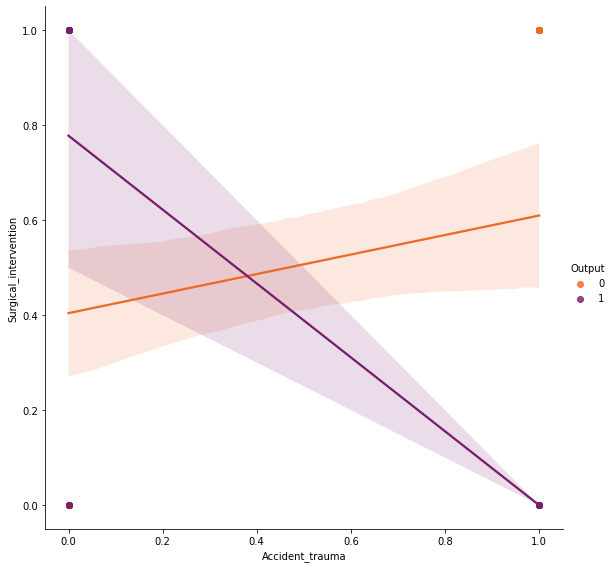

In [ ]:
sns.lmplot(x="Accident_trauma", y="Surgical_intervention", hue="Output", data=data, palette = 'inferno_r', height = 8)

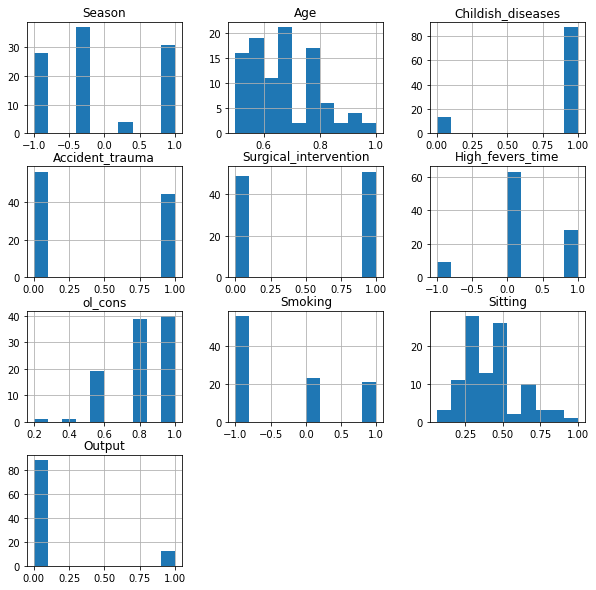

In [ ]:
data.hist(figsize=(10,10))
plt.show()

(array([16., 19., 11., 21.,  2., 17.,  6.,  2.,  4.,  2.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Patch objects>)

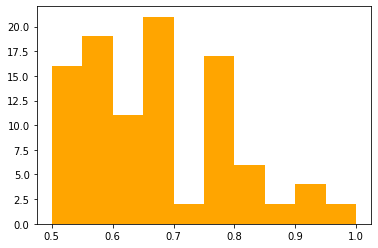

In [ ]:
plt.hist(data['Age'], color="orange")

# LOGISTIC MODEL FITTING

In [ ]:
# independent variables
x = data.drop(['Output'],axis=1)
# dependent variables
y = data['Output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train);

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [ ]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.00      0.00      0.00         0

    accuracy                           0.90        30
   macro avg       0.50      0.45      0.47        30
weighted avg       1.00      0.90      0.95        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

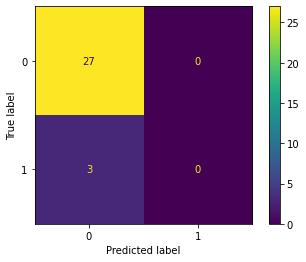

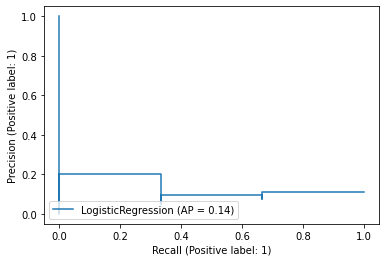

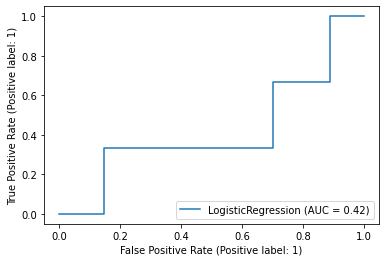

In [ ]:
print("LOGISTIC REGRESSION MODEL")
report(lr_model);

MODEL 2

In [ ]:
# independent variables
x = data.drop(['Output'],axis=1)
# dependent variables
y = data['Output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train);

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [ ]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.00      0.00      0.00         0

    accuracy                           0.90        20
   macro avg       0.50      0.45      0.47        20
weighted avg       1.00      0.90      0.95        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

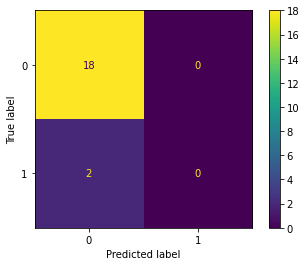

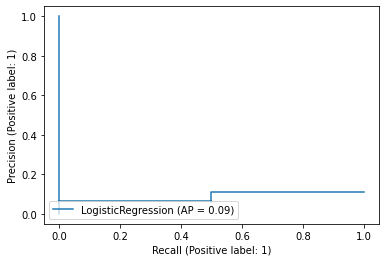

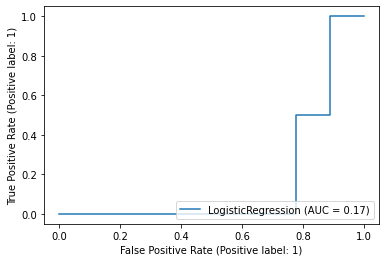

In [ ]:
print("LOGISTIC REGRESSION MODEL")
report(lr_model);

MODEL 3

In [ ]:
# independent variables
x = data.drop(['Output'],axis=1)
# dependent variables
y = data['Output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train);

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [ ]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.00      0.00      0.00         0

    accuracy                           0.88        25
   macro avg       0.50      0.44      0.47        25
weighted avg       1.00      0.88      0.94        25



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

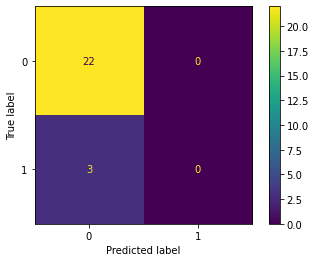

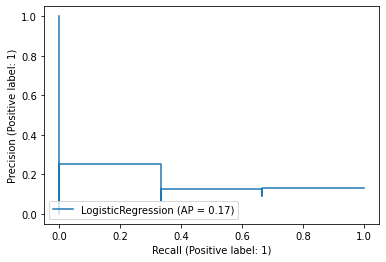

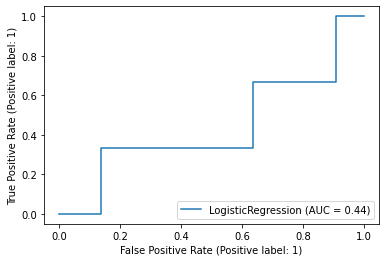

In [ ]:
print("LOGISTIC REGRESSION MODEL")
report(lr_model);

MODEL 4

In [ ]:
# independent variables
x = data.drop(['Output'],axis=1)
# dependent variables
y = data['Output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train);

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [ ]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.00      0.00      0.00         0

    accuracy                           0.90        40
   macro avg       0.50      0.45      0.47        40
weighted avg       1.00      0.90      0.95        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

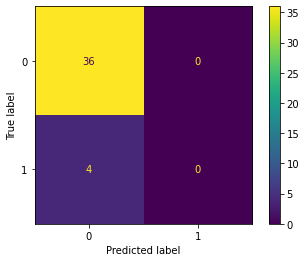

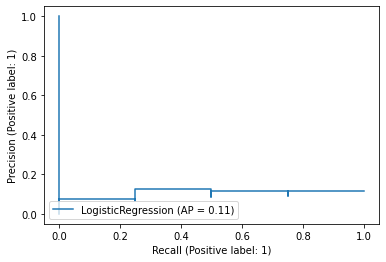

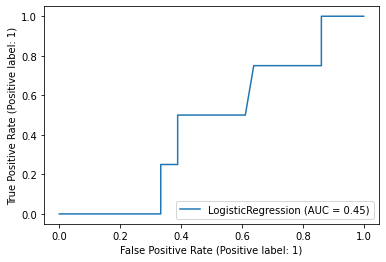

In [ ]:
print("LOGISTIC REGRESSION MODEL")
report(lr_model);

# **NEURAL NETWORKS**

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(12, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.7468 - accuracy: 0.1867 - precision: 0.0806 - a=recall: 0.5556
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.8400 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6463 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6293 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6121 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.5931 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/50
3/3 [==

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 394ms/step - loss: 0.8284 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.8283942937850952, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

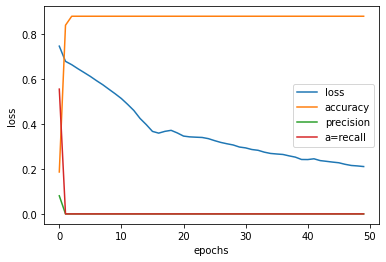

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6949 - accuracy: 0.6267 - precision: 0.0870 - a=recall: 0.2222
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6598 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6254 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5626 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 0.4851 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4095 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/100


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 351ms/step - loss: 2.9173 - accuracy: 0.8800 - precision: 0.5000 - a=recall: 0.3333


[2.9173059463500977, 0.8799999952316284, 0.5, 0.3333333432674408]

Text(0.5, 0, 'epochs')

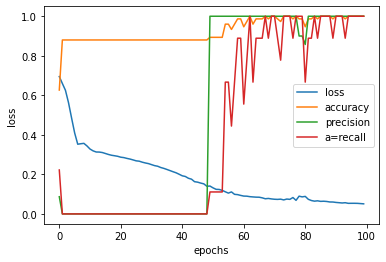

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 125)

Epoch 1/125


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 4ms/step - loss: 0.7250 - accuracy: 0.2133 - precision: 0.1094 - a=recall: 0.7778
Epoch 2/125
3/3 [==============================] - 0s 5ms/step - loss: 0.6752 - accuracy: 0.8400 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/125
3/3 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/125
3/3 [==============================] - 0s 5ms/step - loss: 0.6287 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/125
3/3 [==============================] - 0s 5ms/step - loss: 0.6024 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/125
3/3 [==============================] - 0s 4ms/step - loss: 0.5732 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/125
3/3 [==============================] - 0s 4ms/step - loss: 0.5363 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/125


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 370ms/step - loss: 1.6047 - accuracy: 0.8800 - precision: 0.5000 - a=recall: 0.3333


[1.6046830415725708, 0.8799999952316284, 0.5, 0.3333333432674408]

Text(0.5, 0, 'epochs')

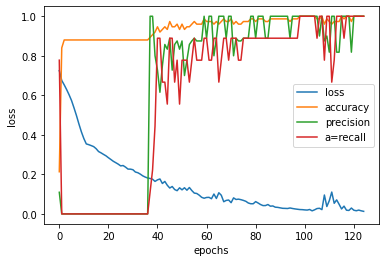

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 4ms/step - loss: 0.7040 - accuracy: 0.3200 - precision: 0.0962 - a=recall: 0.5556
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6377 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.5981 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.5512 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/50
3/3 [==

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 377ms/step - loss: 1.0146 - accuracy: 0.8400 - precision: 0.3333 - a=recall: 0.3333


[1.0146199464797974,
 0.8399999737739563,
 0.3333333432674408,
 0.3333333432674408]

Text(0.5, 0, 'epochs')

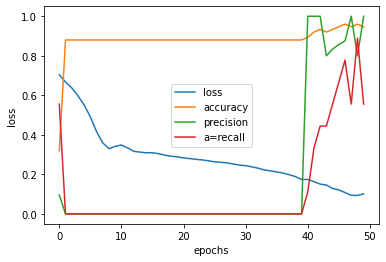

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 75)

Epoch 1/75


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.7217 - accuracy: 0.1733 - precision: 0.1159 - a=recall: 0.8889
Epoch 2/75
3/3 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.9067 - precision: 1.0000 - a=recall: 0.2222
Epoch 3/75
3/3 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/75
3/3 [==============================] - 0s 5ms/step - loss: 0.6217 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/75
3/3 [==============================] - 0s 5ms/step - loss: 0.5827 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/75
3/3 [==============================] - 0s 5ms/step - loss: 0.5319 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/75
3/3 [==============================] - 0s 6ms/step - loss: 0.4662 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/75
3/3 [==========

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 431ms/step - loss: 0.7800 - accuracy: 0.9200 - precision: 1.0000 - a=recall: 0.3333


[0.780009388923645, 0.9200000166893005, 1.0, 0.3333333432674408]

Text(0.5, 0, 'epochs')

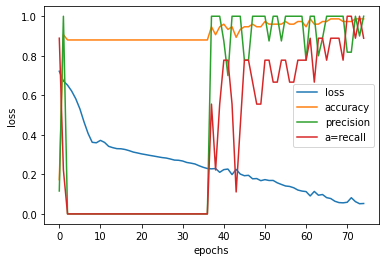

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 75)

Epoch 1/75


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.7220 - accuracy: 0.1600 - precision: 0.1143 - a=recall: 0.8889
Epoch 2/75
3/3 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.8667 - precision: 0.4000 - a=recall: 0.2222
Epoch 3/75
3/3 [==============================] - 0s 5ms/step - loss: 0.6666 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/75
3/3 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/75
3/3 [==============================] - 0s 5ms/step - loss: 0.6362 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/75
3/3 [==============================] - 0s 5ms/step - loss: 0.6168 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/75
3/3 [==============================] - 0s 5ms/step - loss: 0.5909 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/75
3/3 [==========

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 429ms/step - loss: 0.9769 - accuracy: 0.8400 - precision: 0.3333 - a=recall: 0.3333


[0.9769030213356018,
 0.8399999737739563,
 0.3333333432674408,
 0.3333333432674408]

Text(0.5, 0, 'epochs')

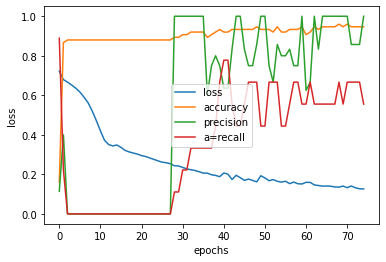

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 70)

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 6ms/step - loss: 0.7060 - accuracy: 0.4133 - precision: 0.0930 - a=recall: 0.4444
Epoch 2/70
3/3 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/70
3/3 [==============================] - 0s 9ms/step - loss: 0.6500 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/70
3/3 [==============================] - 0s 6ms/step - loss: 0.6158 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/70
3/3 [==============================] - 0s 7ms/step - loss: 0.5738 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/70
3/3 [==============================] - 0s 4ms/step - loss: 0.5206 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/70
3/3 [==============================] - 0s 4ms/step - loss: 0.4572 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/70
3/3 [==

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 407ms/step - loss: 1.0566 - accuracy: 0.9200 - precision: 1.0000 - a=recall: 0.3333


[1.056594729423523, 0.9200000166893005, 1.0, 0.3333333432674408]

Text(0.5, 0, 'epochs')

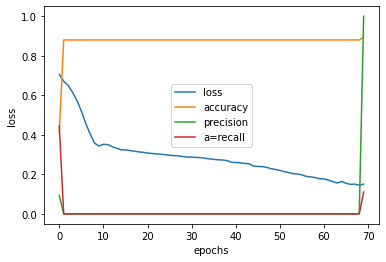

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 80)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5333 - precision: 0.0667 - a=recall: 0.2222
Epoch 2/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6746 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6611 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6453 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/80
3/3 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/80
3/3 [==============================] - 0s 5ms/step - loss: 0.5944 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/80
3/3 [==

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 372ms/step - loss: 0.7036 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.7035868763923645, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

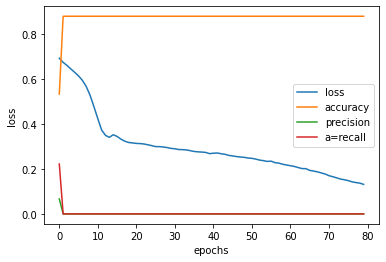

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 90)

Epoch 1/90


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.7014 - accuracy: 0.3733 - precision: 0.0870 - a=recall: 0.4444
Epoch 2/90
3/3 [==============================] - 0s 5ms/step - loss: 0.6753 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/90
3/3 [==============================] - 0s 5ms/step - loss: 0.6615 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/90
3/3 [==============================] - 0s 5ms/step - loss: 0.6452 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/90
3/3 [==============================] - 0s 8ms/step - loss: 0.6292 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/90
3/3 [==============================] - 0s 5ms/step - loss: 0.6124 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/90
3/3 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/90
3/3 [==

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 366ms/step - loss: 0.3671 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.36707255244255066, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

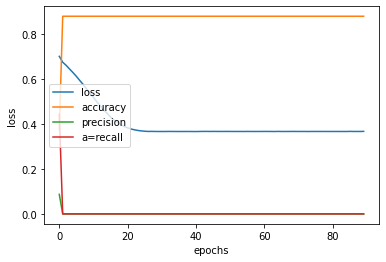

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 75)

Epoch 1/75


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6203 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/75
3/3 [==============================] - 0s 5ms/step - loss: 0.4998 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/75
3/3 [==============================] - 0s 5ms/step - loss: 0.4202 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/75
3/3 [==============================] - 0s 7ms/step - loss: 0.3611 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/75
3/3 [==============================] - 0s 6ms/step - loss: 0.3539 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/75
3/3 [==============================] - 0s 5ms/step - loss: 0.3518 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/75
3/3 [==============================] - 0s 6ms/step - loss: 0.3462 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/75

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 414ms/step - loss: 2.5525 - accuracy: 0.8400 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[2.5525026321411133, 0.8399999737739563, 0.0, 0.0]

Text(0.5, 0, 'epochs')

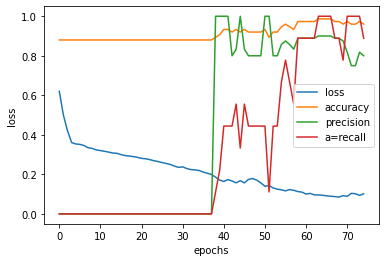

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 105)

Epoch 1/105


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6715 - accuracy: 0.7733 - precision: 0.1000 - a=recall: 0.1111
Epoch 2/105
3/3 [==============================] - 0s 5ms/step - loss: 0.6003 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/105
3/3 [==============================] - 0s 4ms/step - loss: 0.5256 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/105
3/3 [==============================] - 0s 4ms/step - loss: 0.4345 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/105
3/3 [==============================] - 0s 5ms/step - loss: 0.3708 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/105
3/3 [==============================] - 0s 5ms/step - loss: 0.3481 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/105
3/3 [==============================] - 0s 4ms/step - loss: 0.3498 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/105


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 392ms/step - loss: 3.8899 - accuracy: 0.8400 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[3.889875888824463, 0.8399999737739563, 0.0, 0.0]

Text(0.5, 0, 'epochs')

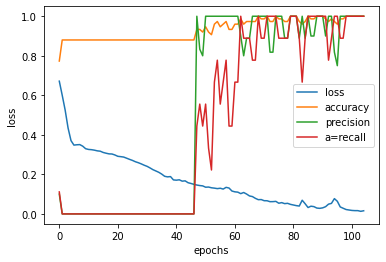

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 205)

Epoch 1/205


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 4ms/step - loss: 0.6909 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/205
3/3 [==============================] - 0s 4ms/step - loss: 0.6793 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/205
3/3 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/205
3/3 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/205
3/3 [==============================] - 0s 5ms/step - loss: 0.6483 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/205
3/3 [==============================] - 0s 9ms/step - loss: 0.6384 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/205
3/3 [==============================] - 0s 5ms/step - loss: 0.6283 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoc

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 413ms/step - loss: 0.3670 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.36695346236228943, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

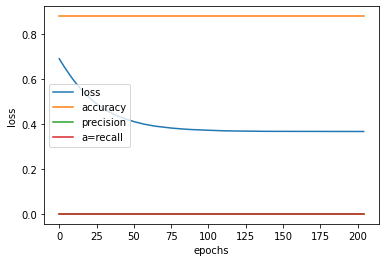

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 8ms/step - loss: 0.7380 - accuracy: 0.2267 - precision: 0.1231 - a=recall: 0.8889
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.7867 - precision: 0.2308 - a=recall: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6459 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6229 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5914 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5473 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/100
3/3 [===

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 411ms/step - loss: 1.9707 - accuracy: 0.8000 - precision: 0.2500 - a=recall: 0.3333


[1.9706748723983765, 0.800000011920929, 0.25, 0.3333333432674408]

Text(0.5, 0, 'epochs')

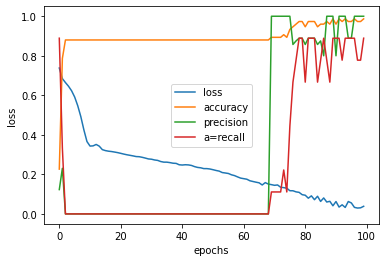

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6321 - accuracy: 0.8533 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 5ms/step - loss: 0.5015 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 6ms/step - loss: 0.4172 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3535 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
3/3 [==============================] - 0s 6ms/step - loss: 0.3519 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3478 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3378 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoc

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 400ms/step - loss: 3.0519 - accuracy: 0.8800 - precision: 0.5000 - a=recall: 0.3333


[3.051910400390625, 0.8799999952316284, 0.5, 0.3333333432674408]

Text(0.5, 0, 'epochs')

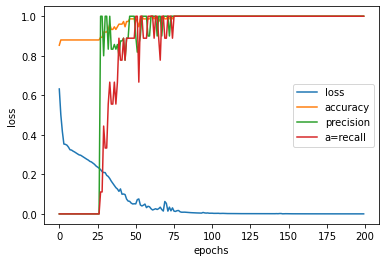

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 300)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.7095 - accuracy: 0.3067 - precision: 0.1091 - a=recall: 0.6667
Epoch 2/300
3/3 [==============================] - 0s 6ms/step - loss: 0.6771 - accuracy: 0.8400 - precision: 0.2000 - a=recall: 0.1111
Epoch 3/300
3/3 [==============================] - 0s 8ms/step - loss: 0.6604 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/300
3/3 [==============================] - 0s 6ms/step - loss: 0.6445 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/300
3/3 [==============================] - 0s 6ms/step - loss: 0.6296 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6144 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/300
3/3 [==============================] - 0s 5ms/step - loss: 0.5982 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/300
3/3 [===

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 543ms/step - loss: 0.3669 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.36692535877227783, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

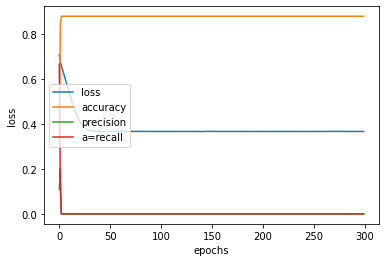

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 7ms/step - loss: 0.7163 - accuracy: 0.3333 - precision: 0.1273 - a=recall: 0.7778
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6754 - accuracy: 0.8667 - precision: 0.4000 - a=recall: 0.2222
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6590 - accuracy: 0.8933 - precision: 1.0000 - a=recall: 0.1111
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6354 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6033 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.5586 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 0.4977 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/50
3/3 [==================

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 413ms/step - loss: 0.6056 - accuracy: 0.9200 - precision: 1.0000 - a=recall: 0.3333


[0.6055966019630432, 0.9200000166893005, 1.0, 0.3333333432674408]

Text(0.5, 0, 'epochs')

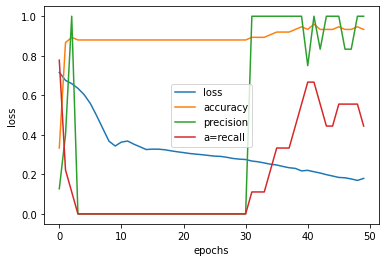

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 150)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 6ms/step - loss: 0.7022 - accuracy: 0.4800 - precision: 0.0588 - a=recall: 0.2222
Epoch 2/150
3/3 [==============================] - 0s 5ms/step - loss: 0.6786 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/150
3/3 [==============================] - 0s 5ms/step - loss: 0.6657 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/150
3/3 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/150
3/3 [==============================] - 0s 6ms/step - loss: 0.6348 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/150
3/3 [==============================] - 0s 6ms/step - loss: 0.6183 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/150
3/3 [==============================] - 0s 6ms/step - loss: 0.6000 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/150


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 380ms/step - loss: 0.3674 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.36741456389427185, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

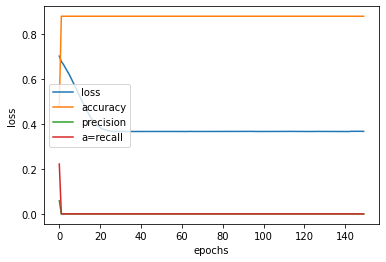

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 70)

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.5773 - accuracy: 0.8533 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/70
3/3 [==============================] - 0s 5ms/step - loss: 0.4209 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/70
3/3 [==============================] - 0s 6ms/step - loss: 0.3982 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/70
3/3 [==============================] - 0s 5ms/step - loss: 0.3744 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/70
3/3 [==============================] - 0s 6ms/step - loss: 0.3524 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/70
3/3 [==============================] - 0s 5ms/step - loss: 0.3335 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/70
3/3 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/70

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 405ms/step - loss: 2.7195 - accuracy: 0.8400 - precision: 0.3333 - a=recall: 0.3333


[2.719496250152588, 0.8399999737739563, 0.3333333432674408, 0.3333333432674408]

Text(0.5, 0, 'epochs')

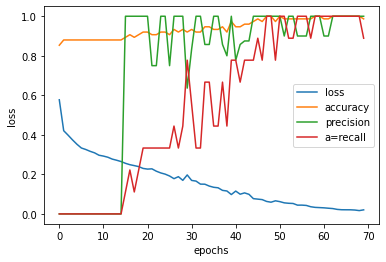

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 150)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6900 - accuracy: 0.7067 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/150
3/3 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/150
3/3 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/150
3/3 [==============================] - 0s 5ms/step - loss: 0.6309 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/150
3/3 [==============================] - 0s 6ms/step - loss: 0.6099 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/150
3/3 [==============================] - 0s 5ms/step - loss: 0.5879 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/150
3/3 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoc

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 404ms/step - loss: 0.3674 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.36738574504852295, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

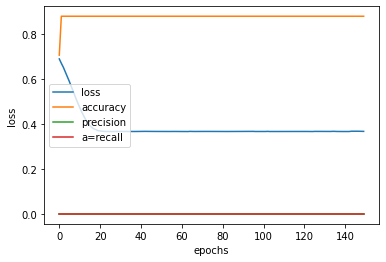

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(12, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 320)

Epoch 1/320


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.7242 - accuracy: 0.1467 - precision: 0.0896 - a=recall: 0.6667
Epoch 2/320
3/3 [==============================] - 0s 5ms/step - loss: 0.6683 - accuracy: 0.8667 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/320
3/3 [==============================] - 0s 5ms/step - loss: 0.6439 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/320
3/3 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/320
3/3 [==============================] - 0s 6ms/step - loss: 0.5611 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/320
3/3 [==============================] - 0s 5ms/step - loss: 0.5053 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/320
3/3 [==============================] - 0s 7ms/step - loss: 0.4385 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/320


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 384ms/step - loss: 3.7044 - accuracy: 0.9200 - precision: 1.0000 - a=recall: 0.3333


[3.7044265270233154, 0.9200000166893005, 1.0, 0.3333333432674408]

Text(0.5, 0, 'epochs')

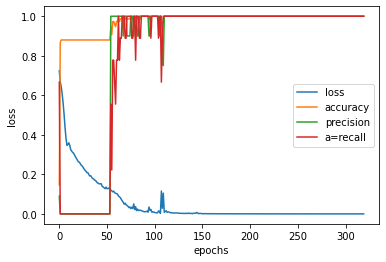

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 70)

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6197 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/70
3/3 [==============================] - 0s 5ms/step - loss: 0.5062 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/70
3/3 [==============================] - 0s 4ms/step - loss: 0.4174 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/70
3/3 [==============================] - 0s 5ms/step - loss: 0.3519 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/70
3/3 [==============================] - 0s 6ms/step - loss: 0.3514 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/70
3/3 [==============================] - 0s 6ms/step - loss: 0.3475 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/70
3/3 [==============================] - 0s 4ms/step - loss: 0.3353 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/70

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 402ms/step - loss: 2.5701 - accuracy: 0.9200 - precision: 1.0000 - a=recall: 0.3333


[2.570089340209961, 0.9200000166893005, 1.0, 0.3333333432674408]

Text(0.5, 0, 'epochs')

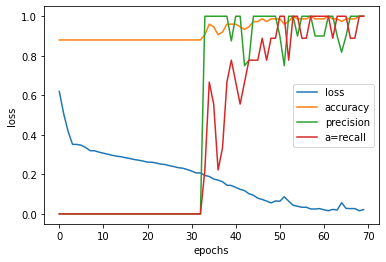

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 80)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 4ms/step - loss: 0.8044 - accuracy: 0.1467 - precision: 0.1233 - a=recall: 1.0000
Epoch 2/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6991 - accuracy: 0.5333 - precision: 0.1176 - a=recall: 0.4444
Epoch 3/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6650 - accuracy: 0.8667 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6474 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6322 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6170 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/80
3/3 [==============================] - 0s 7ms/step - loss: 0.6008 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/80
3/3 [==========

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 364ms/step - loss: 1.0214 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.0213971138000488, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

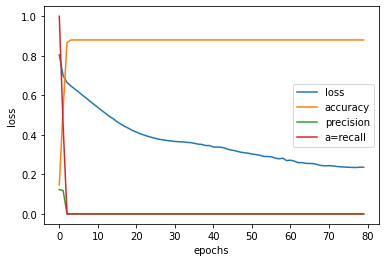

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 90)

Epoch 1/90


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6907 - accuracy: 0.7067 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/90
3/3 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/90
3/3 [==============================] - 0s 4ms/step - loss: 0.6408 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/90
3/3 [==============================] - 0s 4ms/step - loss: 0.6135 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/90
3/3 [==============================] - 0s 4ms/step - loss: 0.5876 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/90
3/3 [==============================] - 0s 5ms/step - loss: 0.5609 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/90
3/3 [==============================] - 0s 6ms/step - loss: 0.5324 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/90

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 408ms/step - loss: 0.3672 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.3671532869338989, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

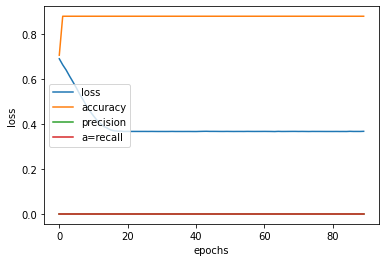

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(1, activation='relu'),
                            tf.keras.layers.Dense(1, activation='relu'),
                            tf.keras.layers.Dense(1, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.8619 - accuracy: 0.2133 - precision: 0.1324 - a=recall: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7318 - accuracy: 0.5467 - precision: 0.1622 - a=recall: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.7467 - precision: 0.2222 - a=recall: 0.4444
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6604 - accuracy: 0.8800 - precision: 0.5000 - a=recall: 0.1111    
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6493 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6392 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6295 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/100
3/3 [===============

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 416ms/step - loss: 0.3729 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.37292641401290894, 0.8799999952316284, 0.0, 0.0]

Text(0.5, 0, 'epochs')

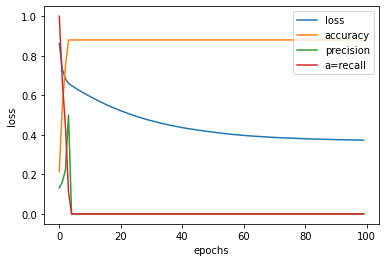

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
55    0
88    0
26    1
42    0
69    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(11, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 105)

Epoch 1/105


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6857 - accuracy: 0.7867 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/105
3/3 [==============================] - 0s 6ms/step - loss: 0.6363 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/105
3/3 [==============================] - 0s 5ms/step - loss: 0.5846 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/105
3/3 [==============================] - 0s 7ms/step - loss: 0.5117 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/105
3/3 [==============================] - 0s 6ms/step - loss: 0.4439 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/105
3/3 [==============================] - 0s 7ms/step - loss: 0.3800 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/105
3/3 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8800 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoc

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 388ms/step - loss: 2.3978 - accuracy: 0.8800 - precision: 0.5000 - a=recall: 0.3333


[2.3977837562561035, 0.8799999952316284, 0.5, 0.3333333432674408]

Text(0.5, 0, 'epochs')

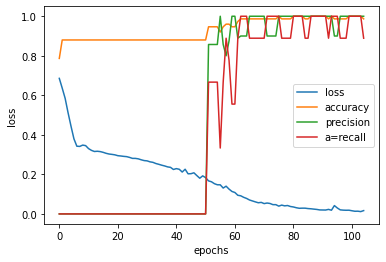

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.7160 - accuracy: 0.3750 - precision: 0.1000 - a=recall: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6764 - accuracy: 0.8500 - precision: 0.2500 - a=recall: 0.1000
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6574 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6333 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.5980 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/50
3/3 [==========

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 421ms/step - loss: 0.8948 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.8948481678962708, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

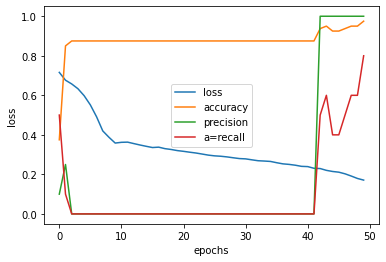

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 150)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.7008 - accuracy: 0.4875 - precision: 0.0811 - a=recall: 0.3000
Epoch 2/150
3/3 [==============================] - 0s 6ms/step - loss: 0.6792 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/150
3/3 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/150
3/3 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/150
3/3 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/150
3/3 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/150
3/3 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/150


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 345ms/step - loss: 0.3295 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.329459011554718, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

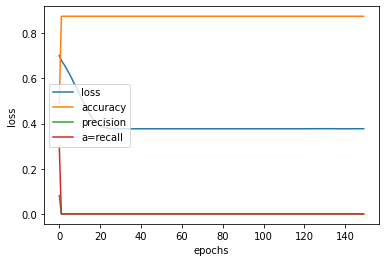

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 70)

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.5751 - accuracy: 0.8375 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/70
3/3 [==============================] - 0s 6ms/step - loss: 0.4385 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/70
3/3 [==============================] - 0s 5ms/step - loss: 0.3971 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/70
3/3 [==============================] - 0s 5ms/step - loss: 0.3793 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/70
3/3 [==============================] - 0s 4ms/step - loss: 0.3618 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/70
3/3 [==============================] - 0s 5ms/step - loss: 0.3442 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/70
3/3 [==============================] - 0s 5ms/step - loss: 0.3334 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/70

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 369ms/step - loss: 3.0496 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[3.049572229385376, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

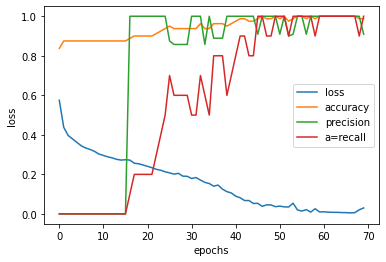

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 150)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6898 - accuracy: 0.7375 - precision: 0.0769 - a=recall: 0.1000
Epoch 2/150
3/3 [==============================] - 0s 5ms/step - loss: 0.6709 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/150
3/3 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/150
3/3 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/150
3/3 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/150
3/3 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/150
3/3 [==============================] - 0s 9ms/step - loss: 0.5636 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/150


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.3294 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.32940587401390076, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

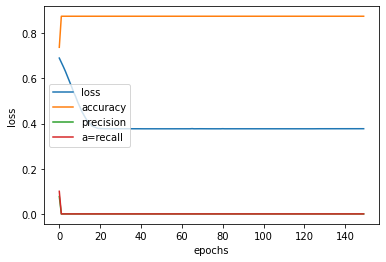

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(12, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 320)

Epoch 1/320


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 4ms/step - loss: 0.7286 - accuracy: 0.2250 - precision: 0.1061 - a=recall: 0.7000
Epoch 2/320
3/3 [==============================] - 0s 6ms/step - loss: 0.6690 - accuracy: 0.8625 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/320
3/3 [==============================] - 0s 6ms/step - loss: 0.6453 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/320
3/3 [==============================] - 0s 6ms/step - loss: 0.6213 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/320
3/3 [==============================] - 0s 6ms/step - loss: 0.5872 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/320
3/3 [==============================] - 0s 6ms/step - loss: 0.5437 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/320
3/3 [==============================] - 0s 7ms/step - loss: 0.4946 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/320


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 565ms/step - loss: 5.2272 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[5.227197170257568, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

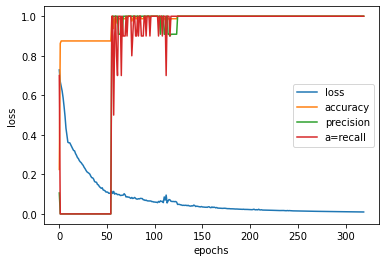

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 70)

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6234 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/70
3/3 [==============================] - 0s 4ms/step - loss: 0.5211 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/70
3/3 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/70
3/3 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/70
3/3 [==============================] - 0s 9ms/step - loss: 0.3667 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/70
3/3 [==============================] - 0s 5ms/step - loss: 0.3578 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/70
3/3 [==============================] - 0s 4ms/step - loss: 0.3412 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/70

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 393ms/step - loss: 2.5696 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[2.5696213245391846, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

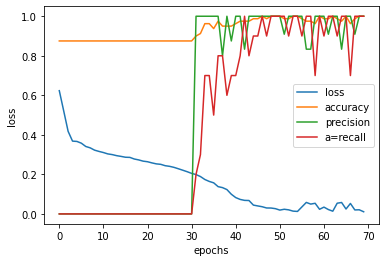

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 80)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.8076 - accuracy: 0.1625 - precision: 0.1299 - a=recall: 1.0000
Epoch 2/80
3/3 [==============================] - 0s 6ms/step - loss: 0.7045 - accuracy: 0.5250 - precision: 0.1316 - a=recall: 0.5000
Epoch 3/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6646 - accuracy: 0.8500 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6467 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/80
3/3 [==============================] - 0s 5ms/step - loss: 0.6308 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/80
3/3 [==============================] - 0s 6ms/step - loss: 0.6150 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/80
3/3 [==============================] - 0s 5ms/step - loss: 0.5997 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/80
3/3 [==========

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 396ms/step - loss: 1.4788 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.4788086414337158, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

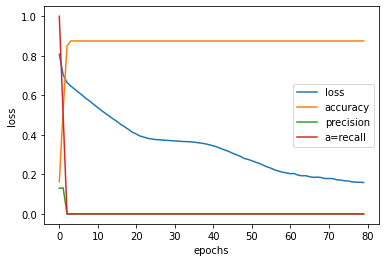

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 90)

Epoch 1/90


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 6ms/step - loss: 0.6903 - accuracy: 0.7375 - precision: 0.0769 - a=recall: 0.1000
Epoch 2/90
3/3 [==============================] - 0s 5ms/step - loss: 0.6646 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/90
3/3 [==============================] - 0s 5ms/step - loss: 0.6397 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/90
3/3 [==============================] - 0s 4ms/step - loss: 0.6142 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/90
3/3 [==============================] - 0s 4ms/step - loss: 0.5868 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/90
3/3 [==============================] - 0s 5ms/step - loss: 0.5593 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/90
3/3 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/90
3/3 [==

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 358ms/step - loss: 0.3274 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.32737261056900024, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

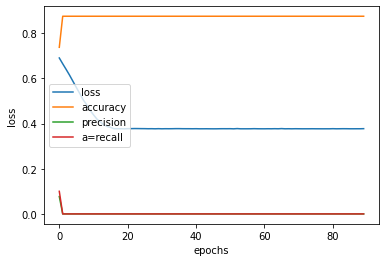

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(1, activation='relu'),
                            tf.keras.layers.Dense(1, activation='relu'),
                            tf.keras.layers.Dense(1, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.8661 - accuracy: 0.2250 - precision: 0.1389 - a=recall: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7358 - accuracy: 0.5125 - precision: 0.1628 - a=recall: 0.7000
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6816 - accuracy: 0.8000 - precision: 0.2857 - a=recall: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.8625 - precision: 0.3333 - a=recall: 0.1000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6494 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6392 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6299 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/100
3/3 [===================

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 362ms/step - loss: 0.3396 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.3396260738372803, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

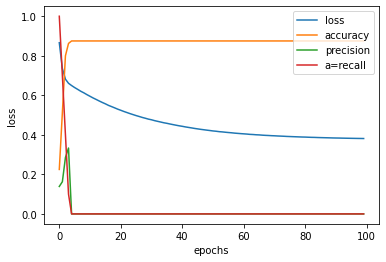

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

83    0
53    0
70    1
45    0
44    0
39    0
22    0
80    0
10    0
0     0
18    0
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    0
31    0
Name: Output, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(11, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fitting the model

history= model.fit(X_train, y_train, epochs= 105)

Epoch 1/105


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 0.6848 - accuracy: 0.7500 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/105
3/3 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/105
3/3 [==============================] - 0s 5ms/step - loss: 0.5793 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/105
3/3 [==============================] - 0s 5ms/step - loss: 0.5117 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/105
3/3 [==============================] - 0s 5ms/step - loss: 0.4383 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/105
3/3 [==============================] - 0s 4ms/step - loss: 0.3825 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/105
3/3 [==============================] - 0s 5ms/step - loss: 0.3528 - accuracy: 0.8750 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoc

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 361ms/step - loss: 3.6512 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[3.6511502265930176, 0.8999999761581421, 0.0, 0.0]

Text(0.5, 0, 'epochs')

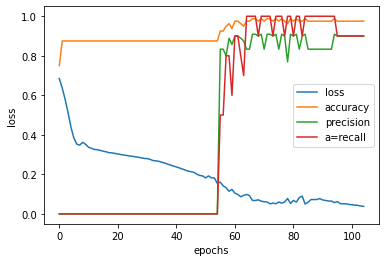

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")